# **Studio-Afrik**

## Overview

With the increasing trend of big studios creating original video content, Studio-Afrik has decided to establish a new movie studio. However, we <br/> currently lack expertise in movie production. To ensure our new venture's success, it is crucial to to carry out data analysis from historical data. <br/> We can derive actionable insights to guide the head of Studio-Afrik in making informed decisions about the types of films to produce.

## Business Understanding

Studio-Afrik aims to enter the movie production industry by establishing its new movie studio. The primary goal is to create original video content that <br/> resonates with audiences and performs well at the box office, leveraging the current trend among big companies.

To ensure the success in this new indurstry, it is crucial to understand the types of films that are currently performing best. This involves analyzing <br/> market trends, audience preferences, and the financial performance of various genres and film types.


## Data Understanding

## Imports & Data

The code cell below contain libraries that are essential in this project analysis.

In [95]:
# Perfom data manipulation and analysis.
import pandas as pd

# Perfoming mathematical calculations.
import numpy as np

# The two libraries below will aid in creating visualizations.
import matplotlib.pyplot as plt 
import seaborn as sns

# Library for linear
import scipy.stats as stats

# This library helps in accessing our relational database.
import sqlite3

# Code below imports all code in the custom_func file
from custom_code import *

### Working with available data

I. **Relational Database**

1. im.db

II. **CSV FILES**

2. tn.movie_budgets.csv

### 1. IMDB

This dataset comprises of multiple tables containing information about movies. The tables of interest are: movie_basics and movie_ratings.

The movie_basics table includes movie titles, release year, and genres. The movie_ratings table includes average movie rating and number of votes. The <br/>
primary key for both tables is movie_id which will help in joining the two tables.

Here, I am creating a Connection to the relational database from im.db using module sqlite3.

In [96]:
path = "Data/im.db"
conn = sqlite3.connect(path)

Display all the tables in the imdb database

In [97]:
query = """
SELECT name 
FROM sqlite_master 
    WHERE type = 'table';
"""
# print tables in the sql database
imdb_tables = pd.read_sql(query, conn) 

In order to start using our data, you will have to view information from tables I find relevant to complete this analysis.

Movie Ratings table

In [98]:
query = """
SELECT * 
FROM movie_ratings;
"""

movie_ratings = pd.read_sql(query, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Movie Basics table

In [99]:
query = """
SELECT * 
FROM movie_basics;
"""

movie_basics= pd.read_sql(query, conn)
movie_basics.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Director Names

JOIN persons table and directors table

In [100]:
query = """
SELECT DISTINCT d.movie_id, d.person_id AS director_id, p.primary_name AS director_name
FROM persons AS p
    INNER JOIN directors AS d
        USING(person_id);
"""

director_data = pd.read_sql(query, conn)
director_data

,movie_id,director_id,director_name
0,tt1592569,nm0062879,Ruel S. Bayani
1,tt2057445,nm0062879,Ruel S. Bayani
2,tt2590280,nm0062879,Ruel S. Bayani
3,tt8421806,nm0062879,Ruel S. Bayani
4,tt3501180,nm0064023,Bryan Beasley
...,...,...,...
163528,tt8697720,nm9971456,Zheng Wei
163529,tt8715016,nm9980896,Rama Narayanan
163530,tt8919136,nm9980896,Rama Narayanan
163531,tt8717234,nm9981679,Samir Eshra


### 2. tn.movie_budgets.csv

This dataset contain financial information about each movie in their dataset. The columns production budget, domestic gross and worldwide gross <br/>
describes how much was spent during production and its return after production in each movie.

It will also help us calculate the foreign gross and net profit based on domestic,foreign and total profit.

In [101]:
finance_df = pd.read_csv("Data/tn.movie_budgets.csv")
display(finance_df.head())
# Check if our dataset contains missing values
display(finance_df.info())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

## Data Analysis & Preparation

Transforming raw data from the above datasets into a format that can be easily and effectively used for analysis.

### Relational Database - IMDB

#### merge movie basics table with movie ratings table from imdb to get more detailed information about movies.

In [102]:
movie_details = movie_basics.merge(movie_ratings, how="inner", left_on="movie_id", right_on="movie_id")

movie_details

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [103]:
# Renaming columns in the movie details dataframe
movie_details.rename(columns={"primary_title": "title", "runtime_minutes": "duration", "genres": "genre", "averagerating": "rating", "numvotes": "votes"}, inplace=True)

In [104]:
# Display more information about the data
movie_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   title           73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   start_year      73856 non-null  int64  
 4   duration        66236 non-null  float64
 5   genre           73052 non-null  object 
 6   rating          73856 non-null  float64
 7   votes           73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Dealing with missing values in movie_details dataframe

In [105]:
# check for missing values
movie_details.isna().sum()

movie_id             0
title                0
original_title       0
start_year           0
duration          7620
genre              804
rating               0
votes                0
dtype: int64

In [106]:
# Drop all missing values in column genre
movie_details = movie_details.dropna(subset = ["genre"])

# fill all missing values in duration with the mean of its column
movie_details.loc[:, "duration"].fillna(value=round(movie_details["duration"].mean()), inplace=True)

movie_details = movie_details.reset_index(drop=True)

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [107]:
# Check if there is any existing missing values
movie_details.isna().sum()

movie_id          0
title             0
original_title    0
start_year        0
duration          0
genre             0
rating            0
votes             0
dtype: int64

In [108]:
# Preview count of how many movies produced per yearly
yearly_movie_count = movie_details.groupby("start_year")['movie_id'].count()
yearly_movie_count

start_year
2010    6701
2011    7274
2012    7602
2013    7905
2014    8269
2015    8405
2016    8613
2017    8638
2018    7476
2019    2169
Name: movie_id, dtype: int64

In [109]:
# Navigation through the genre column and only keeping the first genre where multiple genres describes a single movie

movie_details['genre'] = movie_details.loc[:, 'genre'].str.split(',').apply(lambda x: x[0]).reset_index(drop=True)

In [110]:
movie_details

,movie_id,title,original_title,start_year,duration,genre,rating,votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,95.0,Comedy,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,6.5,119
...,...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8.7,136
73050,tt9914642,Albatross,Albatross,2017,95.0,Documentary,8.5,8


In [111]:
# convert year into a string so as to perform aggregate functions on the movie details dataframe.
movie_details['start_year'] = movie_details['start_year'].astype(str)

# convert rating into an integer so as to perform aggregate functions on the movie details dataframe.
movie_details['rating'] = movie_details['rating'].astype(int)

In [112]:
# display information
movie_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73052 entries, 0 to 73051
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73052 non-null  object 
 1   title           73052 non-null  object 
 2   original_title  73052 non-null  object 
 3   start_year      73052 non-null  object 
 4   duration        73052 non-null  float64
 5   genre           73052 non-null  object 
 6   rating          73052 non-null  int32  
 7   votes           73052 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 4.2+ MB


Aggregate functions

In [113]:
# Group by genre and calculate the mean of ratings and votes
movie_avg_rating_genre = movie_details.groupby('genre')[["rating", "votes", "duration"]].mean().sort_values(by='rating', ascending=False)
movie_avg_rating_genre = movie_avg_rating_genre.round({"rating": 1, "votes": 0, "duration": 0})
movie_avg_rating_genre

,rating,votes,duration
genre,,,
Game-Show,9.0,7.0,130.0
Music,7.0,223.0,100.0
Documentary,6.9,213.0,88.0
Biography,6.7,5186.0,91.0
Sport,6.5,59.0,90.0
Musical,6.2,142.0,105.0
History,6.0,94.0,100.0
Adventure,5.9,10420.0,91.0
Drama,5.9,2199.0,98.0


In [114]:
# Number of movies per genre
movie_avg_rating_genre['movies_per_genre'] = movie_details.groupby('genre')['movie_id'].count()
movie_avg_rating_genre

,rating,votes,duration,movies_per_genre
genre,,,,
Game-Show,9.0,7.0,130.0,1
Music,7.0,223.0,100.0,192
Documentary,6.9,213.0,88.0,13962
Biography,6.7,5186.0,91.0,3433
Sport,6.5,59.0,90.0,89
Musical,6.2,142.0,105.0,153
History,6.0,94.0,100.0,136
Adventure,5.9,10420.0,91.0,2596
Drama,5.9,2199.0,98.0,18572


In [115]:
movie_avg_rating_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Game-Show to Adult
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            25 non-null     float64
 1   votes             25 non-null     float64
 2   duration          25 non-null     float64
 3   movies_per_genre  25 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1000.0+ bytes


In [116]:
# agg of columns above
display(movie_avg_rating_genre["rating"].median())

display(movie_avg_rating_genre["votes"].median())

display(movie_avg_rating_genre["duration"].median())

5.6

511.0

97.0

Filter Genre by count

In [117]:
# filtering out genres that have a count less than 500
filter_movie_avg_rating_genre = movie_avg_rating_genre.loc[movie_avg_rating_genre['movies_per_genre'] > 500 ]
filter_movie_avg_rating_genre.sort_values(by="movies_per_genre")

,rating,votes,duration,movies_per_genre
genre,,,,
Family,5.6,511.0,92.0,604
Romance,5.6,594.0,106.0,786
Animation,5.8,2026.0,84.0,962
Thriller,5.3,295.0,95.0,1563
Crime,5.7,5287.0,97.0,2494
Adventure,5.9,10420.0,91.0,2596
Biography,6.7,5186.0,91.0,3433
Horror,4.4,2369.0,88.0,4490
Action,5.4,14476.0,103.0,6988


#### Merge movie details dataframe with director data dataframe to get all the information about movies produced.

The Movie details dataframe contains data about movie id, title, year, time, genres, ratings, votes and the director data dataframe contains information <br/>
about movie id, director name

In [118]:
movie_infor = movie_details.merge(director_data, how="inner", left_on="movie_id", right_on="movie_id")

movie_infor

,movie_id,title,original_title,start_year,duration,genre,rating,votes,director_id,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7,77,nm0712540,Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7,43,nm0002411,Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6,4517,nm0000080,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,95.0,Comedy,6,13,nm0611531,Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,6,119,nm0749914,Raoul Ruiz
...,...,...,...,...,...,...,...,...,...,...
85227,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6,5,nm1502645,Sarah Christman
85228,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6,6,nm0812850,Giancarlo Soldi
85229,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8,136,nm4394529,Ahmet Faik Akinci
85230,tt9914642,Albatross,Albatross,2017,95.0,Documentary,8,8,nm5300859,Chris Jordan


Drop unnecessary columns from the above dataframe

In [119]:
movie_infor.drop(columns="original_title", inplace=True)

In [120]:
movie_infor

,movie_id,title,start_year,duration,genre,rating,votes,director_id,director_name
0,tt0063540,Sunghursh,2013,175.0,Action,7,77,nm0712540,Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,2019,114.0,Biography,7,43,nm0002411,Mani Kaul
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6,4517,nm0000080,Orson Welles
3,tt0069204,Sabse Bada Sukh,2018,95.0,Comedy,6,13,nm0611531,Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,2017,80.0,Comedy,6,119,nm0749914,Raoul Ruiz
...,...,...,...,...,...,...,...,...,...
85227,tt9913056,Swarm Season,2019,86.0,Documentary,6,5,nm1502645,Sarah Christman
85228,tt9913084,Diabolik sono io,2019,75.0,Documentary,6,6,nm0812850,Giancarlo Soldi
85229,tt9914286,Sokagin Çocuklari,2019,98.0,Drama,8,136,nm4394529,Ahmet Faik Akinci
85230,tt9914642,Albatross,2017,95.0,Documentary,8,8,nm5300859,Chris Jordan


#### CSV File

Dealing with data from the csv datasets.

**tn.movie_budgets.csv** <br/>
The tn.movie_budgets.csv dataset contain data about finances in the movie indurstry. The data available includes production budget, domestic gross, <br/>
worldwide gross that will help us calculate the foreign gross and the net profit based on domestic, foreign and worldwide film production.

In [121]:
finance_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,"$7,000",$0,$0
5778,79,2-Apr-99,Following,"$6,000","$48,482","$240,495"
5779,80,13-Jul-05,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,29-Sep-15,A Plague So Pleasant,"$1,400",$0,$0


Before performing any calculations, we need to ensure we are dealing with numbers by checking the data type. In this dataset, <br/>
the columns with finace data need to be cleaned.

The function call below helps convert production budget, domestic gross, worldwide gross into intergers and remove any unnecessary string punctuations.

In [122]:
# columns to apply in my function
my_finance_columns = ["domestic_gross", "production_budget", "worldwide_gross"]

# imported function from custom_func.py
finance_col(finance_df, my_finance_columns)


In [123]:
# finance gross
finance_df["foreign_gross"] = finance_df["worldwide_gross"] - finance_df["domestic_gross"]

# domestic profit
finance_df["domestic_profit"] = finance_df["domestic_gross"] - finance_df["production_budget"]

# foreign profit
finance_df["foreign_profit"] = finance_df["foreign_gross"] - finance_df["production_budget"]

# net profit
finance_df["net_profit"] = finance_df["worldwide_gross"] - finance_df["production_budget"]

In [124]:
finance_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,net_profit
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747
...,...,...,...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0,0,-7000,-7000,-7000
5778,79,2-Apr-99,Following,6000,48482,240495,192013,42482,186013,234495
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,0,-3662,-5000,-3662
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0,-1400,-1400,-1400


#### Drop columns that will not be applied in my analysis.

In [125]:
finance_df.drop(columns="release_date", inplace=True)
finance_df

,id,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,net_profit
0,1,Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875
2,3,Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747
...,...,...,...,...,...,...,...,...,...
5777,78,Red 11,7000,0,0,0,-7000,-7000,-7000
5778,79,Following,6000,48482,240495,192013,42482,186013,234495
5779,80,Return to the Land of Wonders,5000,1338,1338,0,-3662,-5000,-3662
5780,81,A Plague So Pleasant,1400,0,0,0,-1400,-1400,-1400


In [126]:
display(finance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
 5   foreign_gross      5782 non-null   int64 
 6   domestic_profit    5782 non-null   int64 
 7   foreign_profit     5782 non-null   int64 
 8   net_profit         5782 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 406.7+ KB


None

In [127]:
finance_df.isna().sum()

id                   0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
foreign_gross        0
domestic_profit      0
foreign_profit       0
net_profit           0
dtype: int64

## Data Visualization

In this section, I will create reasonable insights from my analysed data and determine what to consider for our Studio-Afrik start-up.

#### Number of movies produced per year.

The plot below shows the total number of movies in every year from the dataset.

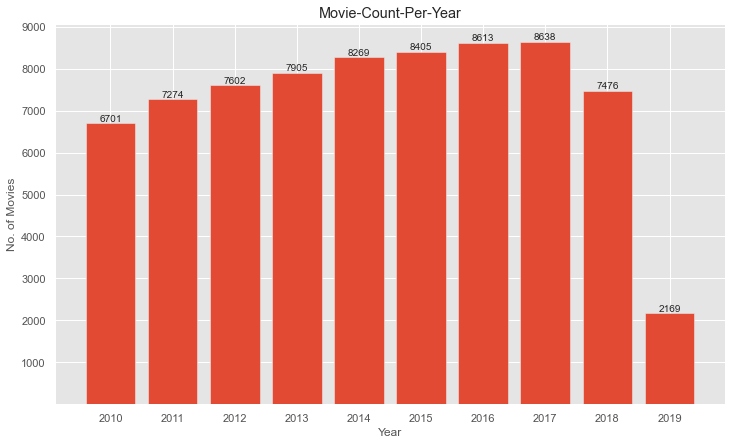

In [128]:
# Data to visualize
plt.style.use('ggplot')

x = yearly_movie_count.sort_values(ascending=False).index
y = yearly_movie_count.sort_values(ascending=False).values

fig, ax = plt.subplots(figsize=(12,7))

# labelling my chart
ax.set(
    title = "Movie-Count-Per-Year", 
    xlabel = "Year",
    ylabel = "No. of Movies",
    # customised ticks
    yticks = [(value * 10**3) for value in np.arange(1,10,1)],
    xticks = [ time for time in x]
)

# plot
bars = ax.bar(x, y)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X coordinate
        height,                             # Y coordinate
        f'{height}',                        # Text label
        ha='center',                        # Horizontal alignment
        va='bottom'                         # Vertical alignment
    )


plt.show()

#### Display the average rating vs votes in each genre.

**NB**: Movie genre should not be picked according to the rating alone, because the visualization below shows high ratings appear in movies that had <br/>
low votes

Therefore, rating should be considered in regards to votes

<function matplotlib.pyplot.show(close=None, block=None)>

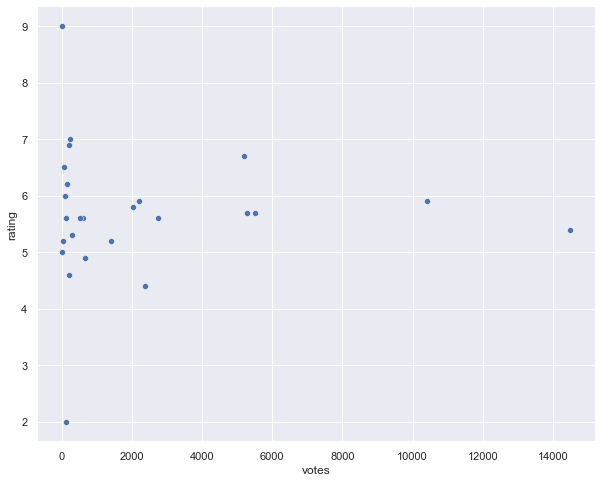

In [129]:
# why it is not a good idea to consider ratings without counter checking number of votes

sns.set_theme(style="darkgrid")
fig, ax =  plt.subplots(figsize=(10,8))
sns.scatterplot(data=movie_avg_rating_genre, x="votes", y="rating")
plt.show

#### Top genre with over 500 movies

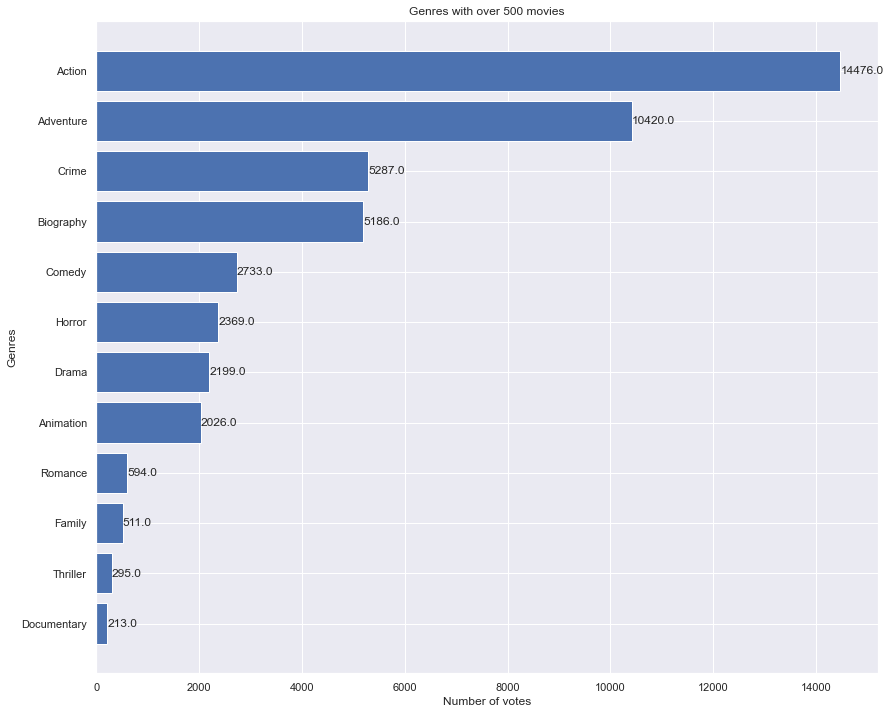

In [141]:
sns.set_theme(style="darkgrid")
fig, ax =  plt.subplots(figsize=(14,12))
x = filter_movie_avg_rating_genre.sort_values(by="votes", ascending=True).index
y = filter_movie_avg_rating_genre.sort_values(by="votes", ascending=True)["votes"]

# labels
ax.set(
    title = "Genres with over 500 movies", 
    xlabel = "Number of votes",
    ylabel = "Genres"
)

bars = ax.barh(x, y)

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{width}', va='center')


plt.show()

#### Multivariate Analysis

The plot below is skewed indicating that our data contains outliers.

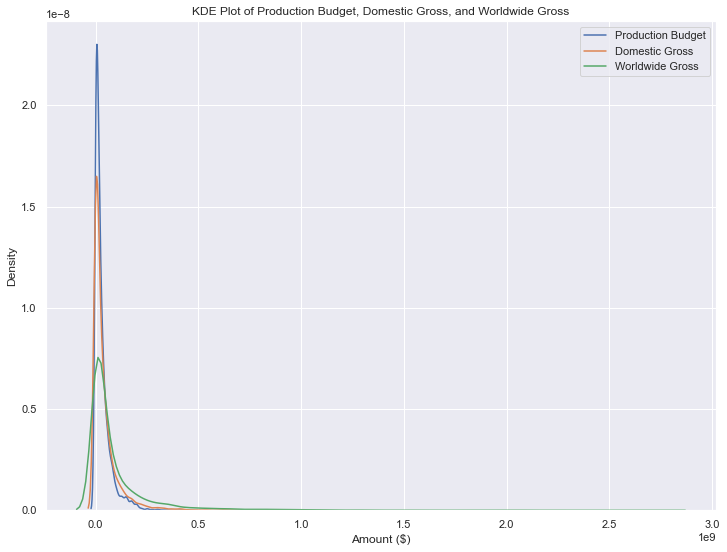

In [131]:
# kde plot of 'production_budget', 'domestic_gross', 'worldwide_gross'
# Create a figure and axis object
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,9))

# Plot the KDE for each column
sns.kdeplot(data=finance_df, x='production_budget', ax=ax, label='Production Budget')
sns.kdeplot(data=finance_df, x='domestic_gross', ax=ax, label='Domestic Gross')
sns.kdeplot(data=finance_df, x='worldwide_gross', ax=ax, label='Worldwide Gross')

# Set the title and labels
ax.set_title('KDE Plot of Production Budget, Domestic Gross, and Worldwide Gross')
ax.set_xlabel('Amount ($)')
ax.set_ylabel('Density')

# Show the legend
ax.legend()

# Show the plot
plt.show()


#### Investments & High ROI

In [132]:
studio_roi = movie_details.merge(finance_df, how="inner", left_on="title", right_on="movie")
studio_roi

,movie_id,title,original_title,start_year,duration,genre,rating,votes,id,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,net_profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,1,8248,26,Foodfight!,45000000,0,73706,73706,-45000000,-44926294,-44926294
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6,37886,17,On the Road,25000000,720828,9313302,8592474,-24279172,-16407526,-15686698
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6,6,17,On the Road,25000000,720828,9313302,8592474,-24279172,-16407526,-15686698
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5,127,17,On the Road,25000000,720828,9313302,8592474,-24279172,-16407526,-15686698
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,Adventure,7,275300,37,The Secret Life of Walter Mitty,91000000,58236838,187861183,129624345,-32763162,38624345,96861183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,tt8680254,Richard III,Richard III,2016,95.0,Drama,9,28,65,Richard III,9200000,2684904,4199334,1514430,-6515096,-7685570,-5000666
2863,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7,7,12,Heroes,400000,655538,655538,0,255538,-400000,255538
2864,tt8976772,Push,Push,2019,92.0,Documentary,7,33,70,Push,38000000,31811527,49678401,17866874,-6188473,-20133126,11678401
2865,tt9024106,Unplanned,Unplanned,2019,106.0,Biography,6,5945,33,Unplanned,6000000,18107621,18107621,0,12107621,-6000000,12107621


In [133]:
studio_roi.drop(columns=["original_title", "id", "movie"], inplace=True)
studio_roi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2867 non-null   object 
 1   title              2867 non-null   object 
 2   start_year         2867 non-null   object 
 3   duration           2867 non-null   float64
 4   genre              2867 non-null   object 
 5   rating             2867 non-null   int32  
 6   votes              2867 non-null   int64  
 7   production_budget  2867 non-null   int64  
 8   domestic_gross     2867 non-null   int64  
 9   worldwide_gross    2867 non-null   int64  
 10  foreign_gross      2867 non-null   int64  
 11  domestic_profit    2867 non-null   int64  
 12  foreign_profit     2867 non-null   int64  
 13  net_profit         2867 non-null   int64  
dtypes: float64(1), int32(1), int64(8), object(4)
memory usage: 324.8+ KB


In [134]:
# check for missing values
studio_roi.isna().sum()

movie_id             0
title                0
start_year           0
duration             0
genre                0
rating               0
votes                0
production_budget    0
domestic_gross       0
worldwide_gross      0
foreign_gross        0
domestic_profit      0
foreign_profit       0
net_profit           0
dtype: int64

Group the studio_roi dataframe by genre and plot net profit vs production budget to observe linearity between the data.

In [135]:
studio_roi_by_genre = studio_roi.groupby('genre')[["production_budget", "worldwide_gross", "foreign_gross", "domestic_gross","foreign_profit","domestic_profit","net_profit"]].mean().sort_values(by="net_profit", ascending=False)
studio_roi_by_genre

,production_budget,worldwide_gross,foreign_gross,domestic_gross,foreign_profit,domestic_profit,net_profit
genre,,,,,,,
Fantasy,4.092500e+07,2.147509e+08,1.414200e+08,7.333090e+07,1.004950e+08,3.240590e+07,1.738259e+08
Adventure,6.817763e+07,2.398441e+08,1.529084e+08,8.693569e+07,8.473078e+07,1.875806e+07,1.716665e+08
Family,3.123262e+07,1.971572e+08,1.060152e+08,9.114204e+07,7.478253e+07,5.990942e+07,1.659246e+08
Animation,4.385157e+07,1.700755e+08,9.893777e+07,7.113769e+07,5.508620e+07,2.728612e+07,1.262239e+08
Action,6.472846e+07,1.904540e+08,1.195223e+08,7.093171e+07,5.479387e+07,6.203254e+06,1.257256e+08
Sci-Fi,3.836000e+07,1.459656e+08,7.625957e+07,6.970608e+07,3.789957e+07,3.134608e+07,1.076056e+08
Mystery,3.321500e+07,9.710790e+07,5.084519e+07,4.626272e+07,1.763019e+07,1.304772e+07,6.389290e+07
Horror,1.636488e+07,7.549052e+07,4.166628e+07,3.382424e+07,2.530140e+07,1.745935e+07,5.912563e+07
Biography,2.427259e+07,6.908652e+07,3.487363e+07,3.421289e+07,1.060104e+07,9.940293e+06,4.481392e+07


#### Linear regression model for production model vs net_profit

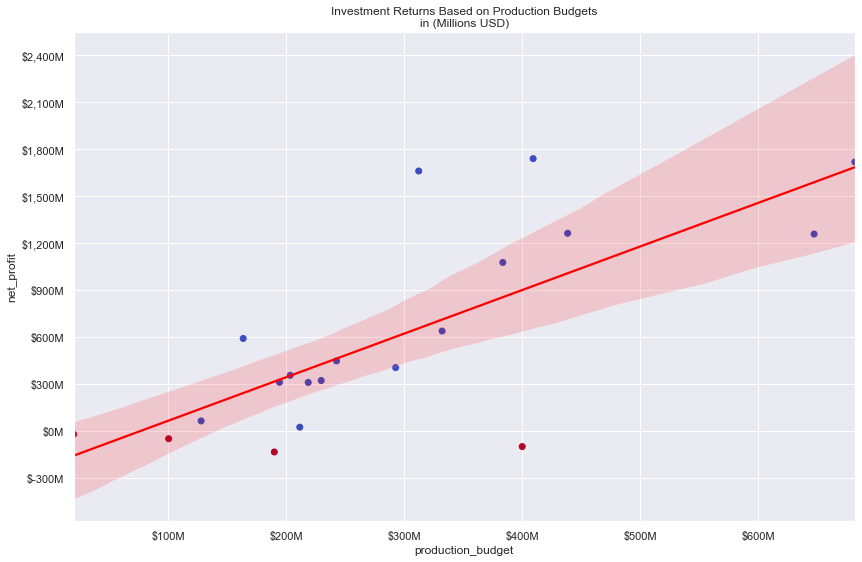

In [162]:
fig, ax = plt.subplots(figsize=(14, 9))

x = studio_roi_by_genre['production_budget']
y = studio_roi_by_genre['net_profit']
ax.scatter(
    x=x,
    y=y,
    c=np.sign(y),
    cmap=plt.cm.coolwarm.reversed()
)

_x_ticks = [value * 10**6 for value in range(10,350+1,10)]
_y_ticks = [value * 10**6 for value in range(-30,1750+1,30)]
ax.set(
    title="Investment Returns Based on Production Budgets\nin (Millions USD)",
    xlabel="Production Budget",
    ylabel="Net Profit",
    xticks=_x_ticks,
    xticklabels = [f'${int(value/100000):,}M' for value in _x_ticks],
    yticks=_y_ticks,
    yticklabels = [f'${int(value/100000):,}M' for value in _y_ticks],
)

sns.regplot(x='production_budget', y='net_profit', data=studio_roi_by_genre, scatter=False, color='red')
plt.show()

In [163]:
# fig, ax = plt.subplots(figsize=(14, 9))

# x = studio_roi_by_genre['production_budget']
# y = studio_roi_by_genre['net_profit']
# ax.scatter(
#     x=x,
#     y=y,
#     c=np.sign(y),
#     cmap=plt.cm.coolwarm.reversed()
# )

# _x_ticks = [value * 10**6 for value in range(10,350+1,10)]
# _y_ticks = [value * 10**6 for value in range(-30,1750+1,30)]
# ax.set(
#     title="Investment Returns Based on Production Budgets\nin (Millions USD)",
#     xlabel="Production Budget",
#     ylabel="Net Profit",
#     xticks=_x_ticks,
#     xticklabels = [f'${int(value/100000):,}M' for value in _x_ticks],
#     yticks=_y_ticks,
#     yticklabels = [f'${int(value/100000):,}M' for value in _y_ticks],
# )

# z = np.polyfit(x, y, 2)
# p = np.poly1d(z)

# ax.plot(x,p(x),"r--")
# plt.xticks(fontsize=14, rotation=0)
# plt.yticks(fontsize=14, rotation=0)
# plt.rc('font', size = 25)
# '';

Find the average net profit achieved in each year in our dataset

In [149]:
studio_roi_by_year = studio_roi.groupby('start_year')[["production_budget", "worldwide_gross", "foreign_gross", "domestic_gross","foreign_profit","domestic_profit","net_profit"]].mean()
studio_roi_by_year

,production_budget,worldwide_gross,foreign_gross,domestic_gross,foreign_profit,domestic_profit,net_profit
start_year,,,,,,,
2010,3.389267e+07,9.915976e+07,5.606330e+07,4.309645e+07,2.217063e+07,9.203784e+06,6.526709e+07
2011,3.516761e+07,9.789789e+07,5.837459e+07,3.952330e+07,2.320698e+07,4.355696e+06,6.273028e+07
2012,3.425390e+07,1.047078e+08,6.227616e+07,4.243160e+07,2.802226e+07,8.177698e+06,7.045385e+07
2013,3.432303e+07,9.781125e+07,5.651543e+07,4.129581e+07,2.219240e+07,6.972785e+06,6.348822e+07
2014,2.937504e+07,9.386530e+07,5.444474e+07,3.942055e+07,2.506970e+07,1.004551e+07,6.449026e+07
2015,2.795641e+07,8.062794e+07,4.687885e+07,3.374909e+07,1.892244e+07,5.792676e+06,5.267153e+07
2016,3.603538e+07,1.125813e+08,6.402047e+07,4.856080e+07,2.798509e+07,1.252542e+07,7.654589e+07
2017,4.151334e+07,1.288640e+08,7.772757e+07,5.113639e+07,3.621423e+07,9.623049e+06,8.735062e+07
2018,3.806005e+07,1.290080e+08,7.456274e+07,5.444531e+07,3.650269e+07,1.638526e+07,9.094800e+07


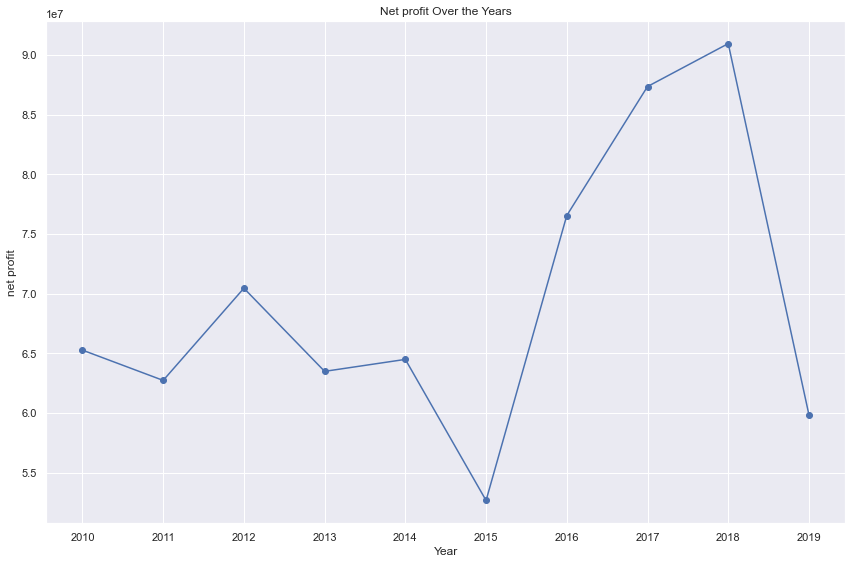

In [159]:
plt.figure(figsize=(12, 8))
plt.plot(studio_roi_by_year.index, studio_roi_by_year["net_profit"], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Net profit Over the Years')
plt.xlabel('Year')
plt.ylabel('net profit')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Recommendations

#### Genre

Studio-Afrik should consider picking top rated genres with highest number of votes. Our analysis indicates a genre can have a high average  <br/>
rating due to low votes. Therefore, they should venture into Action, Adventure, Crime, Biography, comedy which are the top five rated genres considering <br/>
they have high number of votes.

#### Invest in production budget

From our analysis above, we observe that investmenting in production budget has a positive return on the net profit. Our data shows a positive linear<br/>
relationship between production budget and net profit.